In [1]:
import backtrader as bt
import datetime
import yfinance as yf
%matplotlib inline

In [2]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)
                

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 10000.00
2002-01-02, Close, 0.42
2002-01-03, Close, 0.42
2002-01-04, Close, 0.42
2002-01-07, Close, 0.41
2002-01-08, Close, 0.40
2002-01-08, BUY CREATE, 0.40
2002-01-09, BUY EXECUTED, 0.41
6
2002-01-09, Close, 0.39
2002-01-10, Close, 0.38
2002-01-11, Close, 0.38
2002-01-14, Close, 0.38
2002-01-15, Close, 0.39
2002-01-16, Close, 0.37
2002-01-16, SELL CREATE, 0.37
2002-01-17, SELL EXECUTED, 0.39
12
2002-01-17, Close, 0.40
2002-01-18, Close, 0.40
2002-01-22, Close, 0.39
2002-01-22, BUY CREATE, 0.39
2002-01-23, BUY EXECUTED, 0.39
15
2002-01-23, Close, 0.41
2002-01-24, Close, 0.41
2002-01-25, Close, 0.42
2002-01-28, Close, 0.42
2002-01-29, Close, 0.41
2002-01-30, Close, 0.43
2002-01-30, SELL CREATE, 0.43
2002-01-31, SELL EXECUTED, 0.43
21
2002-01-31, Close, 0.44
2002-02-01, Close, 0.44
2002-02-04, Close, 0.45
2002-02-05, Close, 0.45
2002-02-06, Close, 0.44
2002-02-07, Close, 0.43
2002-02-07, BUY C

2003-12-03, Close, 0.38
2003-12-03, BUY CREATE, 0.38
2003-12-04, BUY EXECUTED, 0.37
486
2003-12-04, Close, 0.38
2003-12-05, Close, 0.37
2003-12-08, Close, 0.38
2003-12-09, Close, 0.37
2003-12-10, Close, 0.36
2003-12-11, Close, 0.38
2003-12-11, SELL CREATE, 0.38
2003-12-12, SELL EXECUTED, 0.38
492
2003-12-12, Close, 0.37
2003-12-15, Close, 0.36
2003-12-15, BUY CREATE, 0.36
2003-12-16, BUY EXECUTED, 0.36
494
2003-12-16, Close, 0.36
2003-12-17, Close, 0.35
2003-12-18, Close, 0.36
2003-12-19, Close, 0.35
2003-12-22, Close, 0.35
2003-12-23, Close, 0.35
2003-12-23, SELL CREATE, 0.35
2003-12-24, SELL EXECUTED, 0.35
500
2003-12-24, Close, 0.36
2003-12-26, Close, 0.37
2003-12-29, Close, 0.38
2003-12-30, Close, 0.38
2003-12-31, Close, 0.38
2004-01-02, Close, 0.38
2004-01-05, Close, 0.40
2004-01-06, Close, 0.39
2004-01-07, Close, 0.40
2004-01-08, Close, 0.42
2004-01-09, Close, 0.41
2004-01-12, Close, 0.42
2004-01-13, Close, 0.43
2004-01-14, Close, 0.43
2004-01-15, Close, 0.41
2004-01-16, Close, 0

2005-10-28, Close, 1.95
2005-10-28, BUY CREATE, 1.95
2005-10-31, BUY EXECUTED, 1.97
966
2005-10-31, Close, 2.06
2005-11-01, Close, 2.05
2005-11-02, Close, 2.14
2005-11-03, Close, 2.21
2005-11-04, Close, 2.18
2005-11-07, Close, 2.15
2005-11-07, SELL CREATE, 2.15
2005-11-08, SELL EXECUTED, 2.14
972
2005-11-08, Close, 2.14
2005-11-08, BUY CREATE, 2.14
2005-11-09, BUY EXECUTED, 2.14
973
2005-11-09, Close, 2.15
2005-11-10, Close, 2.18
2005-11-11, Close, 2.20
2005-11-14, Close, 2.19
2005-11-15, Close, 2.22
2005-11-16, Close, 2.32
2005-11-16, SELL CREATE, 2.32
2005-11-17, SELL EXECUTED, 2.34
979
2005-11-17, Close, 2.30
2005-11-18, Close, 2.31
2005-11-21, Close, 2.32
2005-11-22, Close, 2.38
2005-11-23, Close, 2.40
2005-11-25, Close, 2.48
2005-11-28, Close, 2.49
2005-11-29, Close, 2.43
2005-11-30, Close, 2.42
2005-11-30, BUY CREATE, 2.42
2005-12-01, BUY EXECUTED, 2.46
988
2005-12-01, Close, 2.56
2005-12-02, Close, 2.59
2005-12-05, Close, 2.57
2005-12-06, Close, 2.64
2005-12-07, Close, 2.64
2005

2007-08-17, Close, 4.36
2007-08-20, Close, 4.36
2007-08-21, Close, 4.56
2007-08-22, Close, 4.73
2007-08-23, Close, 4.68
2007-08-24, Close, 4.83
2007-08-27, Close, 4.72
2007-08-28, Close, 4.53
2007-08-28, BUY CREATE, 4.53
2007-08-29, BUY EXECUTED, 4.64
1425
2007-08-29, Close, 4.79
2007-08-30, Close, 4.87
2007-08-31, Close, 4.95
2007-09-04, Close, 5.15
2007-09-05, Close, 4.88
2007-09-06, Close, 4.82
2007-09-06, SELL CREATE, 4.82
2007-09-07, SELL EXECUTED, 4.71
1431
2007-09-07, Close, 4.71
2007-09-07, BUY CREATE, 4.71
2007-09-10, BUY EXECUTED, 4.89
1432
2007-09-10, Close, 4.88
2007-09-11, Close, 4.84
2007-09-12, Close, 4.89
2007-09-13, Close, 4.90
2007-09-14, Close, 4.96
2007-09-17, Close, 4.94
2007-09-17, SELL CREATE, 4.94
2007-09-18, SELL EXECUTED, 4.97
1438
2007-09-18, Close, 5.03
2007-09-19, Close, 5.03
2007-09-20, Close, 5.01
2007-09-20, BUY CREATE, 5.01
2007-09-21, BUY EXECUTED, 5.04
1441
2007-09-21, Close, 5.15
2007-09-24, Close, 5.30
2007-09-25, Close, 5.47
2007-09-26, Close, 5.46

2009-06-05, Close, 5.17
2009-06-08, Close, 5.14
2009-06-09, Close, 5.10
2009-06-09, BUY CREATE, 5.10
2009-06-10, BUY EXECUTED, 5.08
1873
2009-06-10, Close, 5.01
2009-06-11, Close, 5.00
2009-06-12, Close, 4.89
2009-06-15, Close, 4.86
2009-06-16, Close, 4.87
2009-06-17, Close, 4.84
2009-06-17, SELL CREATE, 4.84
2009-06-18, SELL EXECUTED, 4.86
1879
2009-06-18, Close, 4.85
2009-06-19, Close, 4.98
2009-06-22, Close, 4.91
2009-06-23, Close, 4.79
2009-06-23, BUY CREATE, 4.79
2009-06-24, BUY EXECUTED, 4.84
1883
2009-06-24, Close, 4.86
2009-06-25, Close, 4.99
2009-06-26, Close, 5.09
2009-06-29, Close, 5.07
2009-06-30, Close, 5.09
2009-07-01, Close, 5.10
2009-07-01, SELL CREATE, 5.10
2009-07-02, SELL EXECUTED, 5.04
1889
2009-07-02, Close, 5.00
2009-07-06, Close, 4.95
2009-07-06, BUY CREATE, 4.95
2009-07-07, BUY EXECUTED, 4.95
1891
2009-07-07, Close, 4.84
2009-07-08, Close, 4.90
2009-07-09, Close, 4.87
2009-07-10, Close, 4.95
2009-07-13, Close, 5.08
2009-07-14, Close, 5.08
2009-07-14, SELL CREATE

2011-09-13, Close, 13.74
2011-09-14, Close, 13.90
2011-09-15, Close, 14.03
2011-09-16, Close, 14.30
2011-09-19, Close, 14.70
2011-09-20, Close, 14.77
2011-09-21, Close, 14.72
2011-09-22, Close, 14.35
2011-09-22, BUY CREATE, 14.35
2011-09-23, BUY EXECUTED, 14.30
2451
2011-09-23, Close, 14.44
2011-09-26, Close, 14.40
2011-09-27, Close, 14.26
2011-09-28, Close, 14.18
2011-09-29, Close, 13.95
2011-09-30, Close, 13.62
2011-09-30, SELL CREATE, 13.62
2011-10-03, SELL EXECUTED, 13.58
2457
2011-10-03, Close, 13.38
2011-10-03, BUY CREATE, 13.38
2011-10-04, BUY EXECUTED, 13.38
2458
2011-10-04, Close, 13.30
2011-10-05, Close, 13.51
2011-10-06, Close, 13.48
2011-10-07, Close, 13.21
2011-10-10, Close, 13.89
2011-10-11, Close, 14.30
2011-10-11, SELL CREATE, 14.30
2011-10-12, SELL EXECUTED, 14.55
2464
2011-10-12, Close, 14.36
2011-10-13, Close, 14.59
2011-10-14, Close, 15.07
2011-10-17, Close, 15.00
2011-10-18, Close, 15.08
2011-10-19, Close, 14.24
2011-10-20, Close, 14.12
2011-10-20, BUY CREATE, 14.1

2013-09-20, SELL EXECUTED, 17.07
2951
2013-09-20, Close, 16.69
2013-09-23, Close, 17.52
2013-09-24, Close, 17.47
2013-09-25, Close, 17.20
2013-09-25, BUY CREATE, 17.20
2013-09-26, BUY EXECUTED, 17.36
2955
2013-09-26, Close, 17.36
2013-09-27, Close, 17.24
2013-09-30, Close, 17.03
2013-10-01, Close, 17.43
2013-10-02, Close, 17.48
2013-10-03, Close, 17.26
2013-10-03, SELL CREATE, 17.26
2013-10-04, SELL EXECUTED, 17.28
2961
2013-10-04, Close, 17.25
2013-10-04, BUY CREATE, 17.25
2013-10-07, BUY EXECUTED, 17.38
2962
2013-10-07, Close, 17.42
2013-10-08, Close, 17.18
2013-10-09, Close, 17.38
2013-10-10, Close, 17.49
2013-10-11, Close, 17.60
2013-10-14, Close, 17.72
2013-10-14, SELL CREATE, 17.72
2013-10-15, SELL EXECUTED, 17.77
2968
2013-10-15, Close, 17.81
2013-10-16, Close, 17.90
2013-10-17, Close, 18.02
2013-10-18, Close, 18.17
2013-10-21, Close, 18.62
2013-10-22, Close, 18.57
2013-10-23, Close, 18.75
2013-10-24, Close, 19.00
2013-10-25, Close, 18.78
2013-10-28, Close, 18.92
2013-10-29, Clo

2015-08-20, Close, 28.16
2015-08-21, Close, 26.44
2015-08-24, Close, 25.78
2015-08-25, Close, 25.93
2015-08-26, Close, 27.42
2015-08-27, Close, 28.23
2015-08-27, SELL CREATE, 28.23
2015-08-28, SELL EXECUTED, 28.04
3439
2015-08-28, Close, 28.32
2015-08-31, Close, 28.19
2015-09-01, Close, 26.93
2015-09-01, BUY CREATE, 26.93
2015-09-02, BUY EXECUTED, 27.56
3442
2015-09-02, Close, 28.08
2015-09-03, Close, 27.59
2015-09-04, Close, 27.32
2015-09-08, Close, 28.08
2015-09-09, Close, 27.54
2015-09-10, Close, 28.14
2015-09-10, SELL CREATE, 28.14
2015-09-11, SELL EXECUTED, 27.95
3448
2015-09-11, Close, 28.55
2015-09-14, Close, 28.83
2015-09-15, Close, 29.07
2015-09-16, Close, 29.10
2015-09-17, Close, 28.48
2015-09-18, Close, 28.36
2015-09-18, BUY CREATE, 28.36
2015-09-21, BUY EXECUTED, 28.42
3454
2015-09-21, Close, 28.80
2015-09-22, Close, 28.35
2015-09-23, Close, 28.58
2015-09-24, Close, 28.75
2015-09-25, Close, 28.68
2015-09-28, Close, 28.11
2015-09-28, SELL CREATE, 28.11
2015-09-29, SELL EXECU

2017-05-26, Close, 38.40
2017-05-30, Close, 38.42
2017-05-31, Close, 38.19
2017-06-01, Close, 38.29
2017-06-02, Close, 38.86
2017-06-05, Close, 38.48
2017-06-06, Close, 38.61
2017-06-07, Close, 38.84
2017-06-08, Close, 38.75
2017-06-09, Close, 37.24
2017-06-09, BUY CREATE, 37.24
2017-06-12, BUY EXECUTED, 36.44
3888
2017-06-12, Close, 36.35
2017-06-13, Close, 36.65
2017-06-14, Close, 36.29
2017-06-15, Close, 36.07
2017-06-16, Close, 35.57
2017-06-19, Close, 36.58
2017-06-19, SELL CREATE, 36.58
2017-06-20, SELL EXECUTED, 36.72
3894
2017-06-20, Close, 36.25
2017-06-21, Close, 36.47
2017-06-22, Close, 36.41
2017-06-23, Close, 36.57
2017-06-26, Close, 36.46
2017-06-27, Close, 35.93
2017-06-27, BUY CREATE, 35.93
2017-06-28, BUY EXECUTED, 36.12
3900
2017-06-28, Close, 36.46
2017-06-29, Close, 35.92
2017-06-30, Close, 36.01
2017-07-03, Close, 35.88
2017-07-05, Close, 36.02
2017-07-06, Close, 35.68
2017-07-06, SELL CREATE, 35.68
2017-07-07, SELL EXECUTED, 35.72
3906
2017-07-07, Close, 36.04
201

2019-04-15, BUY EXECUTED, 49.65
4351
2019-04-15, Close, 49.81
2019-04-16, Close, 49.81
2019-04-17, Close, 50.78
2019-04-18, Close, 50.97
2019-04-22, Close, 51.13
2019-04-23, Close, 51.87
2019-04-23, SELL CREATE, 51.87
2019-04-24, SELL EXECUTED, 51.84
4357
2019-04-24, Close, 51.79
2019-04-25, Close, 51.32
2019-04-25, BUY CREATE, 51.32
2019-04-26, BUY EXECUTED, 51.22
4359
2019-04-26, Close, 51.08
2019-04-29, Close, 51.15
2019-04-30, Close, 50.17
2019-05-01, Close, 52.63
2019-05-02, Close, 52.29
2019-05-03, Close, 52.94
2019-05-03, SELL CREATE, 52.94
2019-05-06, SELL EXECUTED, 51.07
4365
2019-05-06, Close, 52.12
2019-05-07, Close, 50.72
2019-05-07, BUY CREATE, 50.72
2019-05-08, BUY EXECUTED, 50.47
4367
2019-05-08, Close, 50.72
2019-05-09, Close, 50.18
2019-05-10, Close, 49.29
2019-05-13, Close, 46.43
2019-05-14, Close, 47.17
2019-05-15, Close, 47.73
2019-05-15, SELL CREATE, 47.73
2019-05-16, SELL EXECUTED, 47.48
4373
2019-05-16, Close, 47.52
2019-05-17, Close, 47.25
2019-05-17, BUY CREATE

2021-05-25, Close, 126.90
2021-05-26, Close, 126.85
2021-05-26, BUY CREATE, 126.85
2021-05-27, BUY EXECUTED, 126.44
4885
2021-05-27, Close, 125.28
2021-05-28, Close, 124.61
2021-06-01, Close, 124.28
2021-06-02, Close, 125.06
2021-06-03, Close, 123.54
2021-06-04, Close, 125.89
2021-06-04, SELL CREATE, 125.89
2021-06-07, SELL EXECUTED, 126.17
4891
2021-06-07, Close, 125.90
2021-06-08, Close, 126.74
2021-06-09, Close, 127.13
2021-06-10, Close, 126.11
2021-06-11, Close, 127.35
2021-06-14, Close, 130.48
2021-06-15, Close, 129.64
2021-06-16, Close, 130.15
2021-06-17, Close, 131.79
2021-06-18, Close, 130.46
2021-06-21, Close, 132.30
2021-06-22, Close, 133.98
2021-06-23, Close, 133.70
2021-06-24, Close, 133.41
2021-06-24, BUY CREATE, 133.41
2021-06-25, BUY EXECUTED, 133.46
4905
2021-06-25, Close, 133.11
2021-06-28, Close, 134.78
2021-06-29, Close, 136.33
2021-06-30, Close, 136.96
2021-07-01, Close, 137.27
2021-07-02, Close, 139.96
2021-07-02, SELL CREATE, 139.96
2021-07-06, SELL EXECUTED, 140.

<IPython.core.display.Javascript object>


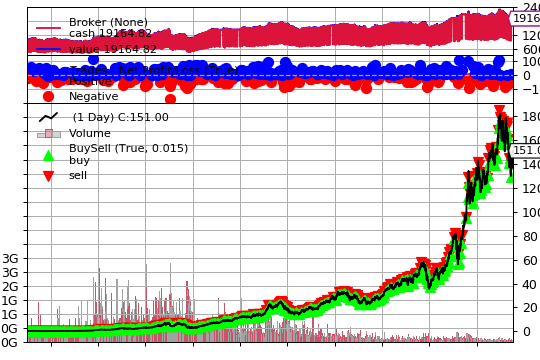

OrderedDict([(2002, 0.022681979717332323),
             (2003, -0.08349764667488813),
             (2004, 0.19275785914328303),
             (2005, 0.24060088305761584),
             (2006, -0.06483698533935156),
             (2007, 0.14249593125800786),
             (2008, -0.28740447461190044),
             (2009, 0.39228149493446485),
             (2010, -0.01795631457136948),
             (2011, 0.06100755251071299),
             (2012, 0.0902624471921285),
             (2013, -0.09437448043598828),
             (2014, 0.07164824045352147),
             (2015, -0.03928609662515592),
             (2016, 0.015422642304659506),
             (2017, 0.06402433425179588),
             (2018, -0.10079823858152404),
             (2019, 0.27435514832155516),
             (2020, 0.08087424999210446),
             (2021, 0.09606069330868161),
             (2022, -0.16092063402913137)])

In [3]:
# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(TestStrategy)

#Get EOD date from Yahoo Finance
df = yf.download('AAPL', start='2002-01-01')

#Add data feed to cerebro
feed = bt.feeds.PandasData(dataname=df)
cerebro.adddata(feed)

# Set our desired cash start
cerebro.broker.setcash(10000.0)

# Set the commission
cerebro.broker.setcommission(commission=0.001)

#add sizer 50% of the whole portoflio
cerebro.addsizer(bt.sizers.PercentSizer, percents=50)

#add annual return analyzer
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
strategy_res = cerebro.run()

#Plot out the back testing results
cerebro.plot()

#Show annual return
strategy_res[0].analyzers.annual_return.get_analysis()